<a href="https://colab.research.google.com/github/pcaze/practice/blob/master/AAI511_Caze_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings


In [ ]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head(n=10)

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5  0.02985   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6  0.08829  12.5   7.87   0.0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7  0.14455  12.5   7.87   0.0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8  0.21124  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9  0.17004  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.71  17.10  18.9

[10 rows x 14 columns]

Exploratory Data Analysis

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[column], name=column), row=cur_row, col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550,  showlegend=False)
fig.show() 

Plots of TARGET(MEDV) and features

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)
fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)
cur_row = 1
cur_col = 1
for index, column in enumerate(df.columns):
    fig.add_trace(go.Scattergl(x=df[column], 
                            y=df['MEDV'], 
                            mode="markers", 
                            marker=dict(size=3)), 
                  row=cur_row, 
                  col=cur_col)
    
    intercept = np.poly1d(np.polyfit(df[column], df['MEDV'], 1))(np.unique(df[column]))
    
    fig.add_trace(go.Scatter(x=np.unique(df[column]), 
                             y=intercept, 
                             line=dict(color='red', width=1)), 
                  row=cur_row, 
                  col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    
fig.update_layout(height=1000, width=550, showlegend=False)
fig.show()

Strong linear relationship between TARGET(MEDV) and RM and LSTAT

Split data into training and test sets

In [ ]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


Normalize data via mean and standard deviation

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

Build model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 595.0221 - mean_absolute_error: 22.5289 - val_loss: 581.8517 - val_mean_absolute_error: 22.2003
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 515.8715 - mean_absolute_error: 20.6979 - val_loss: 511.2231 - val_mean_absolute_error: 20.6722
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 483.0880 - mean_absolute_error: 19.7582 - val_loss: 413.5226 - val_mean_absolute_error: 18.3530
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 338.6236 - mean_absolute_error: 16.2082 - val_loss: 296.3020 - val_mean_absolute_error: 15.0691
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 244.5946 - mean_absolute_error: 13.1048 - val_loss: 175.1889 - val_mean_absolute_error: 11.1313
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 146.3553 - mean_absolute_error: 9.7359 - val_loss: 93.5785 - val_mean_absolute_er

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mean_absolute_error'],
                           name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mean_absolute_error'],
                           name = 'Valid'))

fig.update_layout(height = 500, width = 700,
                  xaxis_title = 'Epoch', 
                  yaxis_title = 'Mean Absolute Error')

fig.show()

Evaluate model

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 17.2698 - mean_absolute_error: 2.5990
Mean squared error on test data:  17.2697811126709
Mean absolute error on test data:  2.598996639251709


Comparison:ANN compared to Linear regression approach


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  28.40585481050824
Mean absolute error on test data:  3.6913626771162575


In [ ]:
!pip install shap

 Summary of features and its impact on the model output

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


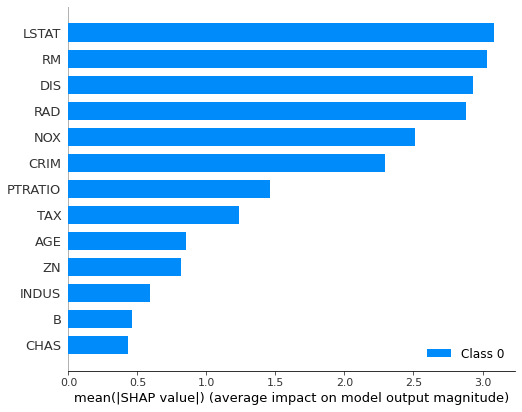

In [ ]:
import shap
shap.initjs()
explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values = explainer.shap_values(X_test[:100].values)
shap.summary_plot(shap_values, X_test, plot_type='bar')